In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Merge mortality et worldbank

### Modifications sur df_mortality

In [2]:
df_mort= pd.read_table('mortality.txt',delimiter=';',names=['Cancer_code', 'Sex', 'Age_bucket', 'Location', 'Year', 'Nb_deaths'],low_memory=False)
df_mort.describe()

,Sex,Age_bucket,Year,Nb_deaths
count,6.359642e+06,6.359642e+06,6.359642e+06,6.359642e+06
mean,1.540061e+00,1.000000e+01,1.992326e+03,3.230369e+01
std,6.528709e-01,5.477226e+00,1.609652e+01,2.649799e+02
min,1.000000e+00,1.000000e+00,1.950000e+03,0.000000e+00
25%,1.000000e+00,5.000000e+00,1.981000e+03,0.000000e+00
50%,2.000000e+00,1.000000e+01,1.996000e+03,0.000000e+00
75%,2.000000e+00,1.500000e+01,2.006000e+03,5.000000e+00
max,9.000000e+00,1.900000e+01,2.015000e+03,3.493500e+04


In [3]:
df_mort.tail(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths
6359637,C32,2,15,Spain,1988,7
6359638,C32,2,16,Spain,1988,5
6359639,C32,2,17,Spain,1988,9
6359640,C32,2,18,Spain,1988,10
6359641,C32,2,19,Spain,1988,0


- Aggregation de la tranche d'age 16 et suppression des tranches d'age 17,18 et 19

In [4]:
length=len(df_mort[df_mort['Age_bucket']==16])
index=df_mort[df_mort['Age_bucket']==16]['Nb_deaths'].index
j=list(range(0, length, 1))
t_16=df_mort[df_mort['Age_bucket']==16]['Nb_deaths'].values
t_17=df_mort[df_mort['Age_bucket']==17]['Nb_deaths'].values
t_18=df_mort[df_mort['Age_bucket']==18]['Nb_deaths'].values
t_19=df_mort[df_mort['Age_bucket']==19]['Nb_deaths'].values
df_mort['Nb_deaths'][index]=t_16[j] + t_17[j] + t_18[j] + t_19[j]

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
index17_18_19=df_mort[(df_mort['Age_bucket']==17) | (df_mort['Age_bucket']==18) | (df_mort['Age_bucket']==19)]['Nb_deaths'].index
df_mort=df_mort.drop(df_mort.index[index17_18_19])
#df_mort.head(19)

In [6]:
#Attention il faut modifier la derniere ligne
df_age = pd.read_csv('age.csv', header = None , sep=' ')
df_age.columns=['Age_bucket', 'Age']
df_age.head()

,Age_bucket,Age
0,1,0-4
1,2,5-9
2,3,10-14
3,4,15-19
4,5,20-24


In [7]:
#read file - cancer codes
df_cancer = pd.read_csv('cancer_codes.csv', header=None, sep='\t')
df_cancer.columns = ['Cancer_code', 'Cancer_label']
df_cancer.head()

,Cancer_code,Cancer_label
0,C00-C14,"Malignant neoplasms of lip, oral cavity and ph..."
1,C15,Malignant neoplasm of oesophagus
2,C15-C26,Malignant neoplasm of digestive organs and per...
3,C16,Malignant neoplasm of stomach
4,C17,"Malignant neoplasm of small intestine, includi..."


In [8]:
#merge age class df + main df
df1 = pd.merge(df_mort, df_age, how='left', left_on='Age_bucket', right_on='Age_bucket')
df1.head()

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Age
0,C80,2,1,Jamaica,2000,2,0-4
1,C80,2,2,Jamaica,2000,0,5-9
2,C80,2,3,Jamaica,2000,1,10-14
3,C80,2,4,Jamaica,2000,0,15-19
4,C80,2,5,Jamaica,2000,0,20-24


- Harmonisation des noms des pays entre les deux fichiers "mortality" et "worldbank"

In [9]:
#read csv file - WorldBank indicators
df_wb = pd.read_csv('WorldBank_Data.csv', sep=',')

In [10]:
df_correspondance=pd.read_table('correspondance.txt',delimiter=';')
df_correspondance.head()
#df_correspondance.describe()

,area,area2
0,Afghanistan,
1,Albania,Albania
2,Algeria,
3,American Samoa,
4,Andorra,


In [11]:
Freq_area2 = df_correspondance.groupby(['area2'])['area2'].count()
#Freq_area2 
# problème à résoudre (je sais pas si c'est un problème en fait...) cela me mets 131 modalités différentes pour la variable area2, 
# car la valeur vide est considérée comme un type de modalité...

In [13]:
# on crée une nouvelle colonne "area2" dane la base worldbank qui correspond au nom du pays dans la base mortality
df_wb2 = pd.merge(df_wb, df_correspondance, on='area')
df_wb2.head()
df_wb2.shape
df_wb.shape
df_wb2['area'].describe() #258 pays différents
df_wb2['area2'].describe() #131 pays différents

count     11648
unique      131
top            
freq       5663
Name: area2, dtype: object

Ensuite, il faudra faire le merge entre la table mortality et worldbank avec la variable area2 au lieu de area. Dans la table mortality, on a 153 pays. Dans la table worldbank, on a 258 pays. En fesant, un merge join='inner' entre les 2 bases, on aura plus que 130 pays différents. En effet, on perd 23 pays de la base mortality. Ce sont pour la plupart des iles, des pays qui n'exitent plus, ou encore des regroupements de pays qui ne sont pas présents dans la base worldbank.

In [14]:
#calculate absolute values per age groups and per sex
df_wb2['SP.POP.TOTL.FE.ZS'].describe() #total population female, percentage
#=> percentace is 0-100, use 100-female to get male
df_wb2['SP.POP.TOTL'].describe() #total population, absolute value

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


count    1.158900e+04
mean     2.274452e+08
std      7.232743e+08
min      5.632000e+03
25%               NaN
50%               NaN
75%               NaN
max      7.346706e+09
Name: SP.POP.TOTL, dtype: float64

In [15]:
df_wb2['SP.POP.TOTL.FE.ZS'].head(5)

0    51.096250
1    51.145732
2    51.207205
3    51.270771
4    51.322594
Name: SP.POP.TOTL.FE.ZS, dtype: float64

In [16]:
df_wb2['SP.POP.TOTL'].head(5)

0    59065.0
1    59438.0
2    59849.0
3    60239.0
4    60525.0
Name: SP.POP.TOTL, dtype: float64

In [17]:
#calculate new variables : transform percentage into absolute values for each group
#naming convention = old name without the .5Y at the end and without the SP in the beginning
pop_par_tranche_dage=['POP.0004.','POP.0509.','POP.1014.','POP.1519.','POP.2024.','POP.2529.','POP.3034.','POP.3539.','POP.4044.','POP.4549.','POP.5054.','POP.5559.','POP.6064.','POP.6569.','POP.7074.','POP.7579.','POP.80UP.']
for i in range(0,17):
    df_wb2[''+pop_par_tranche_dage[i]+'FE'] =(df_wb2['SP.POP.TOTL']*df_wb2['SP.POP.TOTL.FE.ZS']*df_wb2['SP.'+pop_par_tranche_dage[i]+'FE.5Y'])/10000
    df_wb2[''+pop_par_tranche_dage[i]+'MA'] =(df_wb2['SP.POP.TOTL']*(100-df_wb2['SP.POP.TOTL.FE.ZS'])*df_wb2['SP.'+pop_par_tranche_dage[i]+'MA.5Y'])/10000


In [18]:
## subsetting dataframe with columns to merge
df_mini = df_wb2[['area','year','POP.0004.FE', 'POP.0509.FE', 'POP.1014.FE', 'POP.1519.FE', 'POP.2024.FE', 'POP.2529.FE', 'POP.3034.FE', 'POP.3539.FE', 'POP.4044.FE', 'POP.4549.FE', 'POP.5054.FE', 'POP.5559.FE', 'POP.6064.FE', 'POP.6569.FE', 'POP.7074.FE', 'POP.7579.FE', 'POP.80UP.FE', 'POP.0004.MA', 'POP.0509.MA', 'POP.1014.MA', 'POP.1519.MA', 'POP.2024.MA', 'POP.2529.MA', 'POP.3034.MA', 'POP.3539.MA', 'POP.4044.MA', 'POP.4549.MA', 'POP.5054.MA', 'POP.5559.MA', 'POP.6064.MA', 'POP.6569.MA', 'POP.7074.MA', 'POP.7579.MA', 'POP.80UP.MA']]
df_mini.head()

,area,year,POP.0004.FE,POP.0509.FE,POP.1014.FE,POP.1519.FE,POP.2024.FE,POP.2529.FE,POP.3034.FE,POP.3539.FE,...,POP.3539.MA,POP.4044.MA,POP.4549.MA,POP.5054.MA,POP.5559.MA,POP.6064.MA,POP.6569.MA,POP.7074.MA,POP.7579.MA,POP.80UP.MA
0,Aruba,1970,3434.0,3793.0,3586.0,3365.0,2879.0,2302.0,1946.0,1915.0,...,1544.0,1316.0,1175.0,1056.0,943.0,886.0,524.0,295.0,144.0,76.0
1,Aruba,1971,3218.0,3713.0,3578.0,3365.0,2975.0,2415.0,2003.0,1955.0,...,1602.0,1348.0,1172.0,1051.0,930.0,895.0,579.0,320.0,160.0,85.0
2,Aruba,1972,3109.0,3574.0,3580.0,3343.0,3043.0,2531.0,2076.0,1973.0,...,1655.0,1393.0,1174.0,1044.0,924.0,881.0,640.0,345.0,178.0,95.0
3,Aruba,1973,3075.0,3374.0,3585.0,3311.0,3078.0,2648.0,2160.0,1980.0,...,1704.0,1449.0,1188.0,1033.0,922.0,854.0,700.0,371.0,197.0,107.0
4,Aruba,1974,3045.0,3143.0,3563.0,3289.0,3082.0,2754.0,2250.0,2000.0,...,1755.0,1512.0,1214.0,1025.0,921.0,827.0,743.0,405.0,216.0,121.0


In [19]:
#list of variable names about sex= female / male
df_mini.columns[df_mini.columns.str.endswith('FE')]
df_mini.columns[df_mini.columns.str.endswith('MA')]

Index(['POP.0004.MA', 'POP.0509.MA', 'POP.1014.MA', 'POP.1519.MA',
       'POP.2024.MA', 'POP.2529.MA', 'POP.3034.MA', 'POP.3539.MA',
       'POP.4044.MA', 'POP.4549.MA', 'POP.5054.MA', 'POP.5559.MA',
       'POP.6064.MA', 'POP.6569.MA', 'POP.7074.MA', 'POP.7579.MA',
       'POP.80UP.MA'],
      dtype='object')

In [20]:
#reshaping
df_mini.set_index(['area', 'year'], inplace=True)
df_mini.columns = pd.MultiIndex.from_tuples(tuple(df_mini.columns.str.split(".")))

transf = df_mini.stack(level = [1,2]).reset_index()
transf.columns = ['Country', 'Year', 'Age_group', 'Sex', 'Population']

In [21]:
#match labels
'''
MA/FE -> 1/2
0004/0509/1014... -> 1/2/3...
!!!classes in worldbank folder cap at 80, mortality folder has more classes(17:80-84, 18:85+, 19:unknown)
'''
transf['Sex'].replace(['MA', 'FE'],[1,2], inplace=True)
transf['Age_group'].replace(['0004','0509','1014','1519','2024','2529','3034','3539','4044','4549','5054','5559','6064','6569','7074','7579'],
list(range(1, 17)), inplace=True)

In [22]:
#merge mortality data with population transformed dataframe
#aggreger la tranche d'age
df = pd.merge(df_mort, 
              transf, 
              how='inner', 
              left_on=['Location', 'Year', 'Age_bucket', 'Sex'], 
right_on=['Country', 'Year', 'Age_group', 'Sex'])
df.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population
0,C80,2,1,Jamaica,2000,2,Jamaica,1,139549.999999
1,C56,2,1,Jamaica,2000,0,Jamaica,1,139549.999999
2,C64,2,1,Jamaica,2000,1,Jamaica,1,139549.999999
3,C44,2,1,Jamaica,2000,0,Jamaica,1,139549.999999
4,C84,2,1,Jamaica,2000,0,Jamaica,1,139549.999999


In [23]:
#calculate mortality as a rate
df['Mortality_rate'] = df['Nb_deaths'] / df['Population']
df['Mortality_rate'].describe()

count    3.652496e+06
mean     1.098289e-04
std      6.163104e-04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.171180e-05
max      8.091666e-02
Name: Mortality_rate, dtype: float64

In [23]:
df.head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate
0,C80,2,1,Jamaica,2000,2,Jamaica,1,139549.999999,0.000014
1,C56,2,1,Jamaica,2000,0,Jamaica,1,139549.999999,0.000000
2,C64,2,1,Jamaica,2000,1,Jamaica,1,139549.999999,0.000007
3,C44,2,1,Jamaica,2000,0,Jamaica,1,139549.999999,0.000000
4,C84,2,1,Jamaica,2000,0,Jamaica,1,139549.999999,0.000000


In [24]:
#Les taux ne sont pas du tout significatifs, on decide de multiplier par 100000
df['Mortality_rate']=df['Mortality_rate']*100000

### Merge avec les indicateurs

In [25]:
indicators = ['area','year','AG.LND.TOTL.K2','AG.LND.TOTL.UR.K2','AG.LND.AGRI.ZS','EG.ELC.ACCS.ZS','EN.ATM.CO2E.KT','NE.CON.TETC.CD','NE.EXP.GNFS.CD','NE.IMP.GNFS.CD','NV.AGR.TOTL.CD','NV.IND.MANF.CD','NV.SRV.TETC.CD','NY.GNS.ICTR.ZS','DT.ODA.OATL.CD','NE.CON.PETC.CD','NY.GDP.MKTP.CD','SP.POP.GROW','SP.POP.DPND','SP.POP.DPND.OL','SP.DYN.TFRT.IN','SP.DYN.TO65.FE.ZS','SP.DYN.TO65.MA.ZS','SP.DYN.IMRT.IN','SP.DYN.LE00.IN','SP.DYN.CONU.ZS','SN.ITK.DEFC.ZS','SH.XPD.TOTL.ZS','SH.TBS.INCD','SH.STA.MMRT.NE','SH.STA.BRTW.ZS','SH.PRV.SMOK.FE','SH.PRV.SMOK.MA','SH.MED.BEDS.ZS','SH.MED.NUMW.P3','SH.MED.PHYS.ZS','SH.HIV.1524.FE.ZS','SH.HIV.1524.MA.ZS',	'SM.POP.NETM','SL.UEM.TOTL.NE.ZS','SL.UEM.TOTL.ZS']
df2=pd.merge(df, 
              df_wb2.loc[:,indicators], 
              how='left',
              left_on=['Location','Year'], 
         right_on=['area','year'])

In [26]:
df2.to_csv('C:/Users/DIARRA née CISSE Bal/Documents/python')

PermissionError: [Errno 13] Permission denied: 'C:/Users/DIARRA née CISSE Bal/Documents/python'

In [26]:
df2.describe(include='all')

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate,...,SH.PRV.SMOK.FE,SH.PRV.SMOK.MA,SH.MED.BEDS.ZS,SH.MED.NUMW.P3,SH.MED.PHYS.ZS,SH.HIV.1524.FE.ZS,SH.HIV.1524.MA.ZS,SM.POP.NETM,SL.UEM.TOTL.NE.ZS,SL.UEM.TOTL.ZS
count,3652496,3.652496e+06,3.652496e+06,3652496,3.652496e+06,3.652496e+06,3652496,3652496.0,3.652496e+06,3.652496e+06,...,426096.000000,418912.000000,1.850960e+06,877920.000000,2.264672e+06,1.122224e+06,1.122224e+06,7.389280e+05,3.042880e+06,2.473952e+06
unique,93,NaN,NaN,106,NaN,NaN,106,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C16,NaN,NaN,Japan,NaN,NaN,Japan,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,102976,NaN,NaN,69744,NaN,NaN,69744,228281.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.517244e+00,8.500000e+00,NaN,1.996764e+03,3.347180e+01,NaN,NaN,6.596906e+05,1.098289e+01,...,19.506121,36.357421,5.781917e+00,5.823201,2.389321e+00,8.181240e-01,4.727612e-01,7.109677e+04,7.980272e+00,8.747960e+00
std,NaN,4.997026e-01,4.609773e+00,NaN,1.209525e+01,3.025290e+02,NaN,NaN,1.142328e+06,6.163104e+01,...,10.911993,11.671599,3.320021e+00,4.303156,1.167508e+00,2.974870e+00,9.506606e-01,4.705178e+05,5.085045e+00,4.954944e+00
min,NaN,1.000000e+00,1.000000e+00,NaN,1.970000e+03,0.000000e+00,NaN,NaN,5.400000e+01,0.000000e+00,...,0.600000,12.500000,5.000000e-01,0.114000,6.220000e-02,1.000000e-01,1.000000e-01,-2.841190e+06,5.000000e-02,2.100000e-01
25%,NaN,1.000000e+00,4.750000e+00,NaN,1.987000e+03,0.000000e+00,NaN,NaN,8.064684e+04,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,8.500000e+00,NaN,1.999000e+03,0.000000e+00,NaN,NaN,2.231107e+05,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.000000e+00,1.225000e+01,NaN,2.007000e+03,5.000000e+00,NaN,NaN,6.600629e+05,2.171180e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On se restreint au cancer du cerveau à partir de l'an 2000

In [62]:
df3=df2[(df2['Year'] >= 2000) & (df2['Cancer_code']=='C71') ]
#Faire une fonction qui calcule le nombre de NA pour chaque indicateu

In [63]:
len(df3)

35056

In [56]:
df2['Cancer_code'].unique()

'SP.POP.DPND':0
'SP.POP.DPND.OL':0, ces deux indicateurs sont les memes.
'SP.DYN.TO65.FE.ZS':0
'SP.DYN.TO65.MA.ZS':0 Survival to age 65, female 


Je recupere les indicateurs qui ont des NA

In [74]:
indicateurs=['AG.LND.TOTL.K2','AG.LND.TOTL.UR.K2','AG.LND.AGRI.ZS','EG.ELC.ACCS.ZS','EN.ATM.CO2E.KT','NE.CON.TETC.CD','NE.EXP.GNFS.CD','NE.IMP.GNFS.CD','NV.AGR.TOTL.CD','NV.IND.MANF.CD','NV.SRV.TETC.CD','NY.GNS.ICTR.ZS','DT.ODA.OATL.CD','NE.CON.PETC.CD','NY.GDP.MKTP.CD','SP.POP.GROW','SP.POP.DPND','SP.POP.DPND.OL','SP.DYN.TFRT.IN','SP.DYN.TO65.FE.ZS','SP.DYN.TO65.MA.ZS','SP.DYN.IMRT.IN','SP.DYN.LE00.IN','SP.DYN.CONU.ZS','SN.ITK.DEFC.ZS','SH.XPD.TOTL.ZS','SH.TBS.INCD','SH.STA.MMRT.NE','SH.STA.BRTW.ZS','SH.PRV.SMOK.FE','SH.PRV.SMOK.MA','SH.MED.BEDS.ZS','SH.MED.NUMW.P3','SH.MED.PHYS.ZS','SH.HIV.1524.FE.ZS','SH.HIV.1524.MA.ZS',	'SM.POP.NETM','SL.UEM.TOTL.NE.ZS','SL.UEM.TOTL.ZS']
indicateurs_NA=[]
for i in range(0,len(indicateurs)): 
    s=repr(indicateurs[i]) + ':' + repr(df3[indicateurs[i]].isnull().values.sum())
    if(df3[indicateurs[i]].isnull().values.sum() > 0):
        indicateurs_NA.append(indicateurs[i])
    #print(df2[indicateurs[i]].isnull().values.any())

In [97]:
df3.groupby(['Year'])[indicateurs_NA[19]].sum()
print(df3[indicateurs[19]].isnull().values.sum())

0


In [ ]:
### df2[df2['Location']=='Jamaica'].head(5)

## Nettoyage du dataframe (A refaire)

In [51]:
df[df['Location']=='Estonia'].head(5)

,Cancer_code,Sex,Age_bucket,Location,Year,Nb_deaths,Country,Age_group,Population,Mortality_rate
1648,C16,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.0
1649,C62,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.0
1650,C60,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.0
1651,C84,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.0
1652,C23,1,1,Estonia,2001,0,Estonia,1,31363.778577,0.0


In [53]:
#df.groupby(['Location'])['Mortality_rate'].sum()

In [50]:
#On verifie que tous les pays ont leur taux de mortalité renseigné
df['Mortality_rate'].isnull().values.any()
#pd.isnull(df['Mortality_rate'])
#df[df['Location']=='Anguilla']

False

### On remarque deux choses:
- Il y a des pays comme Estonia qui n'ont aucune donnée consernant les tranches d'ages 17,18 et 19 dans worldbank
- Il y a des pays comme l'Anguilla qui n'etaient pas présent dans wordbank mais presents dans mortality 

je decide donc de supprimer ces lignes.

In [18]:
df2=df.dropna(subset=['Country'])

In [156]:
#test
#pd.isnull(df['Mortality_rate'][1])
#pd.isnull([1,2])

In [49]:
#df.groupby(['Location'])['Location']
#location=df['Location'].unique()
len(df['Location'].unique())

106

In [34]:
len(df2['Location'].unique())

106

Je suis donc passée de 153 pays à 106 pays et la tranche d'age est entre 1 et 16.

In [26]:
df2['Age_bucket'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int64)

In [168]:
#for i in range(0,len(Locations)):
#    print(len(df2[df2['Location']==Locations[i]]['Mortality_rate']))

In [167]:
#plot time series
#cancer='C80'
#plot_data = df_mort[df_mort['Cancer_code'] == cancer]
#df_mort\
#    .groupby([df_mort.Year.name, df_mort.Location.name])['Nb_deaths']\
#    .sum()\
#    .unstack()\
#.plot(figsize=(15,15))

Je veux detecter les pays qui ont des coupures et les années correspondantes pour connaitre la tranche d'année la plus interessante à prendre

In [36]:
#df3=df2[df2['Year']<'2004'] & df2[df2['Year']>'2002']
df3=df2[df2['Year'] > 2000]

In [ ]:
year=df2.groupby(['Year'].['Year'].unique())

In [28]:
years=df2.groupby(['Location'])['Year'].unique().values
for i in range(0,len(years)):
    years[i]=np.sort(years[i])

In [30]:
#df.groupby(['Location'])['Year'].unique()
#years
#for i in range(0,len(location)):
#    for j in range(0,len(df[df['Location']==Locations[i]])):
#        pd.isnull(df[df['Location']==location[i]])

### Clustering

In [54]:
# test
S=df.fillna(0)
df4=S.copy()


In [56]:
features =df4.pivot_table(index=["Year","Age_bucket","Sex","Cancer_code"],
                          columns="Location", values=["Mortality_rate"]).reset_index()


In [57]:
featuress=features.fillna(0)

In [58]:
names = featuress.columns[4:]
len(names)

106

In [59]:
from sklearn.cluster import KMeans
clus = KMeans(8)
clus.fit(featuress[names])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
pred = clus.predict(featuress[names])
set(pred)

{0, 1, 2, 3, 4, 5, 6, 7}

In [62]:
features["cluster"] = pred

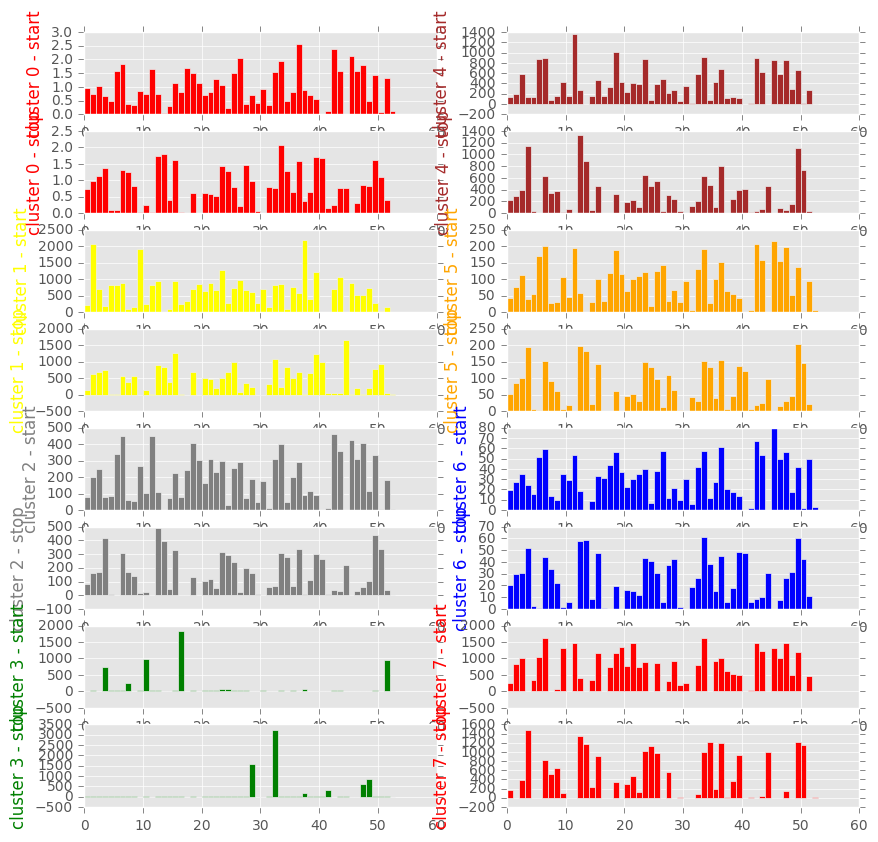

In [63]:
centers = clus.cluster_centers_.T
fig, ax = plt.subplots(centers.shape[1], 2, figsize=(10,10))
nbf = centers.shape[0] // 2
x = list(range(0,nbf))
col = 0
dec = 0
colors = ["red", "yellow", "gray", "green", "brown", "orange", "blue"]
for i in range(centers.shape[1]):
    if 2*i == centers.shape[1]:
        col += 1
        dec += centers.shape[1]
    color = colors[i%len(colors)]
    ax[2*i-dec, col].bar (x, centers[:nbf,i], width=1.0, color=color)
    ax[2*i-dec, col].set_ylabel("cluster %d - start" % i, color=color)
    ax[2*i+1-dec, col].bar (x, centers[nbf:,i], width=1.0, color=color)
    ax[2*i+1-dec, col].set_ylabel("cluster %d - stop" % i, color=color)

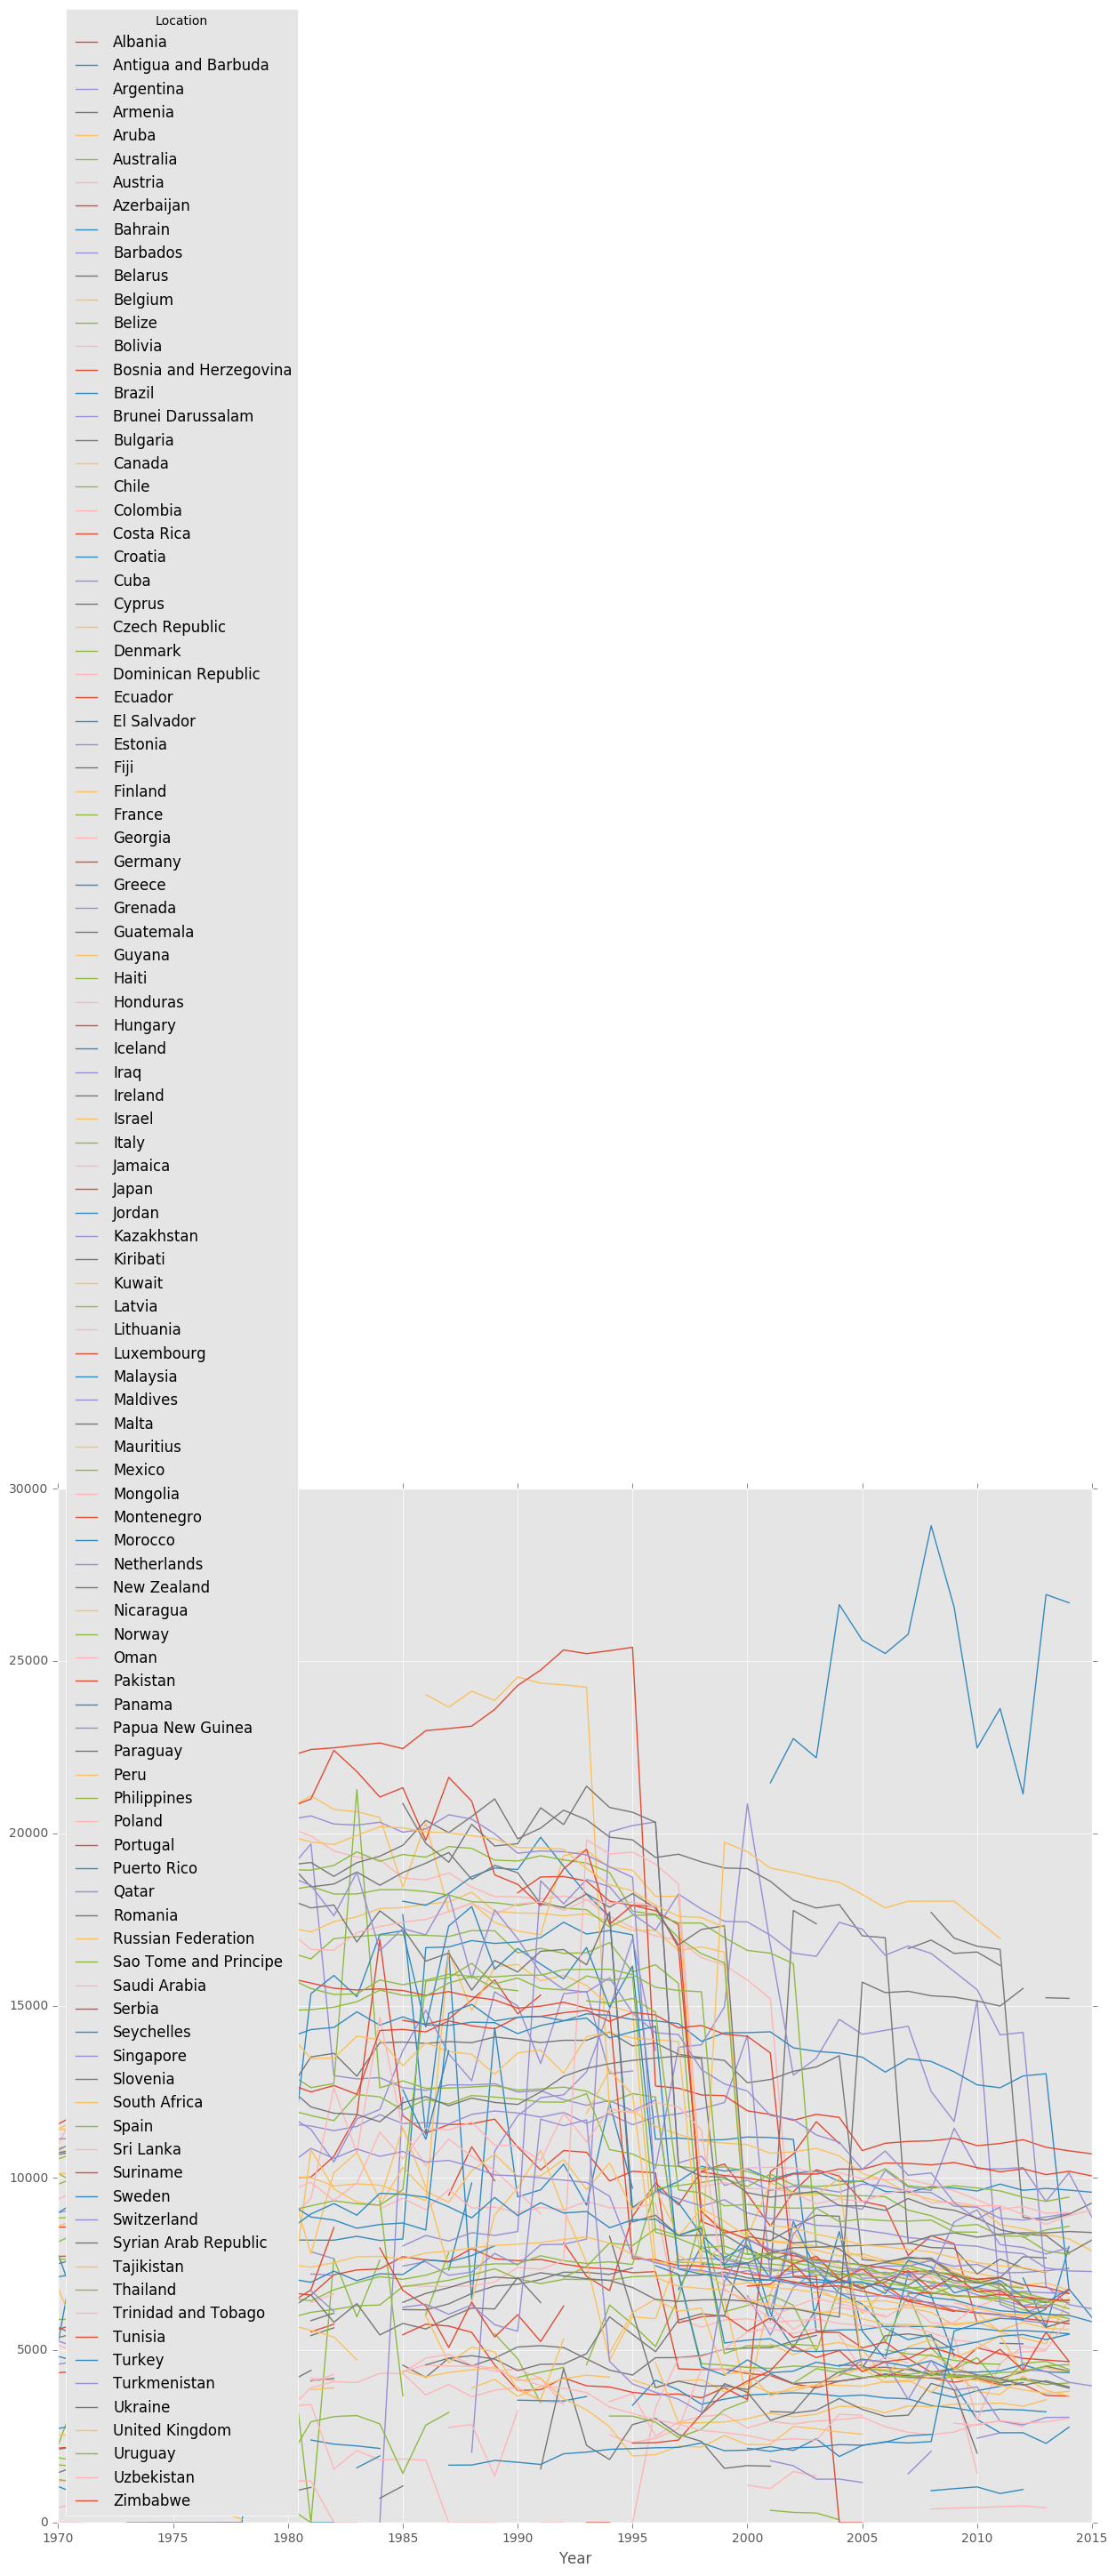

In [164]:
#plot time series
cancer='C80'
plot_data = df2[df2['Cancer_code'] == cancer]
df2\
    .groupby([df2.Year.name, df2.Location.name])['Mortality_rate']\
    .sum()\
    .unstack()\
.plot(figsize=(15,15))